# 1. Analysis

- In this step, I will continue to analyze each of the three datasets that I conducted exploratory analysis in the previous notebook respectively, and then find insights to recommend to the company.

- Research questions of interest:<br>
#### How to best optimize the sales efforts for the cloud-based software company<br>
  1.Which state should be the starting point for marketing purpose to increase sales of the cloud-based software for dental practice in US?<br>
  2.Which aspect of software functionality should be emphasized in targeted states?<br>
  3.What is the main marketing channel and where should the company deploy the sales force?

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Median household income by state in the U.S. 2013-2017.

In [2]:
#reading the data into dataframe
df1 = pd.read_csv("https://raw.githubusercontent.com/mhan1/Capstone-Project/master/median_household_income_by_state.csv")
df1.head(3)

,State,Income,Margin Of Error
0,Alabama,"$46,472",+/- $301
1,Alaska,"$76,114",+/- $979
2,Arizona,"$53,510",+/- $259


In [3]:
#checking the number of rows and columns
df1.shape

(53, 3)

In [4]:
df1

,State,Income,Margin Of Error
0,Alabama,"$46,472",+/- $301
1,Alaska,"$76,114",+/- $979
2,Arizona,"$53,510",+/- $259
3,Arkansas,"$43,813",+/- $401
4,California,"$67,169",+/- $192
5,Colorado,"$65,458",+/- $317
6,Connecticut,"$73,781",+/- $450
7,Delaware,"$63,036",+/- $738
8,District of Columbia,"$77,649","+/- $1,075"
9,Florida,"$50,883",+/- $140


In [5]:
#checking the last row information
df1[52:]

,State,Income,Margin Of Error
52,"Source(s): U.S. Census Bureau, 2013-2017 Ameri...",NaN,NaN


In [6]:
# drop the last row, which is not valid information 
df1 = df1.drop(df1.index[52])
df1.tail()

,State,Income,Margin Of Error
47,Virginia,"$68,766",+/- $319
48,Washington,"$66,174",+/- $272
49,West Virginia,"$44,061",+/- $439
50,Wisconsin,"$56,759",+/- $213
51,Wyoming,"$60,938",+/- $836


In [7]:
#checking the number of rows and columns
df1.shape

(52, 3)

In [8]:
#checking the column names
df1.columns

Index(['State', 'Income', 'Margin Of Error'], dtype='object')

In [9]:
#checking the unique values in the 'State' column
df1['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [10]:
#checking the number of states in the dataframe
len(df1['State'])

52

In [11]:
#checking the unique values in the "Income" column
df1['Income'].unique()

array(['$46,472 ', '$76,114 ', '$53,510 ', '$43,813 ', '$67,169 ',
       '$65,458 ', '$73,781 ', '$63,036 ', '$77,649 ', '$50,883 ',
       '$52,977 ', '$74,923 ', '$50,985 ', '$61,229 ', '$52,182 ',
       '$56,570 ', '$55,477 ', '$46,535 ', '$46,710 ', '$53,024 ',
       '$78,916 ', '$74,167 ', '$52,668 ', '$65,699 ', '$42,009 ',
       '$51,542 ', '$50,801 ', '$56,675 ', '$55,434 ', '$71,305 ',
       '$76,475 ', '$46,718 ', '$62,765 ', '$50,320 ', '$61,285 ',
       '$52,407 ', '$49,767 ', '$56,119 ', '$56,951 ', '$19,775 ',
       '$61,043 ', '$48,781 ', '$54,126 ', '$48,708 ', '$57,051 ',
       '$65,325 ', '$57,808 ', '$68,766 ', '$66,174 ', '$44,061 ',
       '$56,759 ', '$60,938 '], dtype=object)

In [12]:
#checking the unique values in the "Margin Of Error" column
df1['Margin Of Error'].unique()

array(['+/- $301', '+/- $979', '+/- $259', '+/- $401', '+/- $192',
       '+/- $317', '+/- $450', '+/- $738', '+/- $1,075', '+/- $140',
       '+/- $282', '+/- $736', '+/- $368', '+/- $190', '+/- $200',
       '+/- $303', '+/- $288', '+/- $353', '+/- $513', '+/- $380',
       '+/- $180', '+/- $249', '+/- $278', '+/- $215', '+/- $479',
       '+/- $392', '+/- $349', '+/- $733', '+/- $425', '+/- $408',
       '+/- $225', '+/- $204', '+/- $669', '+/- $153', '+/- $240',
       '+/- $370', '+/- $205', '+/- $176', '+/- $763', '+/- $531',
       '+/- $242', '+/- $183', '+/- $407', '+/- $741', '+/- $319',
       '+/- $272', '+/- $439', '+/- $213', '+/- $836'], dtype=object)

In [13]:
# checking if there is null value in each column
df1.isnull().any(axis=0)

State              False
Income             False
Margin Of Error    False
dtype: bool

In [14]:
#brief summary of the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 3 columns):
State              52 non-null object
Income             52 non-null object
Margin Of Error    52 non-null object
dtypes: object(3)
memory usage: 1.6+ KB


In [15]:
#removing unwanted parts in the 'Margin of Error' column and then converting into numeric datatype.
df1['Margin Of Error'] = df1['Margin Of Error'].map(lambda x: x.lstrip('+/- $'))
df1['Margin Of Error'] = df1['Margin Of Error'].str.replace(',', '')
df1['Margin Of Error'] = df1['Margin Of Error'].astype(float)
df1['Margin Of Error'].head()

0    301.0
1    979.0
2    259.0
3    401.0
4    192.0
Name: Margin Of Error, dtype: float64

In [16]:
df1['Margin Of Error'].describe()

count      52.000000
mean      392.884615
std       219.597819
min       140.000000
25%       236.250000
50%       334.000000
75%       441.750000
max      1075.000000
Name: Margin Of Error, dtype: float64

In [17]:
df1['Income'] = df1['Income'].replace({'\$': '', ',': ''}, regex=True)
df1['Income'] = df1['Income'].astype(float)
df1['Income'].head()

0    46472.0
1    76114.0
2    53510.0
3    43813.0
4    67169.0
Name: Income, dtype: float64

In [18]:
df1['Income'].describe()

count       52.000000
mean     57496.826923
std      11115.944598
min      19775.000000
25%      50862.500000
50%      56344.500000
75%      65358.250000
max      78916.000000
Name: Income, dtype: float64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 3 columns):
State              52 non-null object
Income             52 non-null float64
Margin Of Error    52 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [20]:
df1.describe()

,Income,Margin Of Error
count,52.000000,52.000000
mean,57496.826923,392.884615
std,11115.944598,219.597819
min,19775.000000,140.000000
25%,50862.500000,236.250000
50%,56344.500000,334.000000
75%,65358.250000,441.750000
max,78916.000000,1075.000000


In [21]:
df1.head(10)

,State,Income,Margin Of Error
0,Alabama,46472.0,301.0
1,Alaska,76114.0,979.0
2,Arizona,53510.0,259.0
3,Arkansas,43813.0,401.0
4,California,67169.0,192.0
5,Colorado,65458.0,317.0
6,Connecticut,73781.0,450.0
7,Delaware,63036.0,738.0
8,District of Columbia,77649.0,1075.0
9,Florida,50883.0,140.0


In [22]:
#sorting the dataframe based on Median Household Income.
df1 = df1.sort_values(by='Income', ascending=False)
df1

,State,Income,Margin Of Error
20,Maryland,78916.0,380.0
8,District of Columbia,77649.0,1075.0
30,New Jersey,76475.0,425.0
1,Alaska,76114.0,979.0
11,Hawaii,74923.0,736.0
21,Massachusetts,74167.0,380.0
6,Connecticut,73781.0,450.0
29,New Hampshire,71305.0,733.0
47,Virginia,68766.0,319.0
4,California,67169.0,192.0


In [23]:
#ranking the State based on Income and then combining with the sorted dataframe. 
rank_df1 = df1['Income'].rank(ascending=False)
result1 = pd.concat([df1, rank_df1], axis=1)
result1['Income_Ranking'] = rank_df1
result1

,State,Income,Margin Of Error,Income,Income_Ranking
20,Maryland,78916.0,380.0,1.0,1.0
8,District of Columbia,77649.0,1075.0,2.0,2.0
30,New Jersey,76475.0,425.0,3.0,3.0
1,Alaska,76114.0,979.0,4.0,4.0
11,Hawaii,74923.0,736.0,5.0,5.0
21,Massachusetts,74167.0,380.0,6.0,6.0
6,Connecticut,73781.0,450.0,7.0,7.0
29,New Hampshire,71305.0,733.0,8.0,8.0
47,Virginia,68766.0,319.0,9.0,9.0
4,California,67169.0,192.0,10.0,10.0


- As shown above table, the top five wealthy states in US are Maryland, District of Columbia, New Jersey, Alaska, Hawaii. The bottom five unwealthy states in US are Puerto Rico, Mississippi, Arkansas, West Virginia, Alabama. I will further anlyze the supply of dentist per 100,000 population in each state to see if there is discrepancy with this result. Also, I will analyze which practice areas are dominant in US as well.

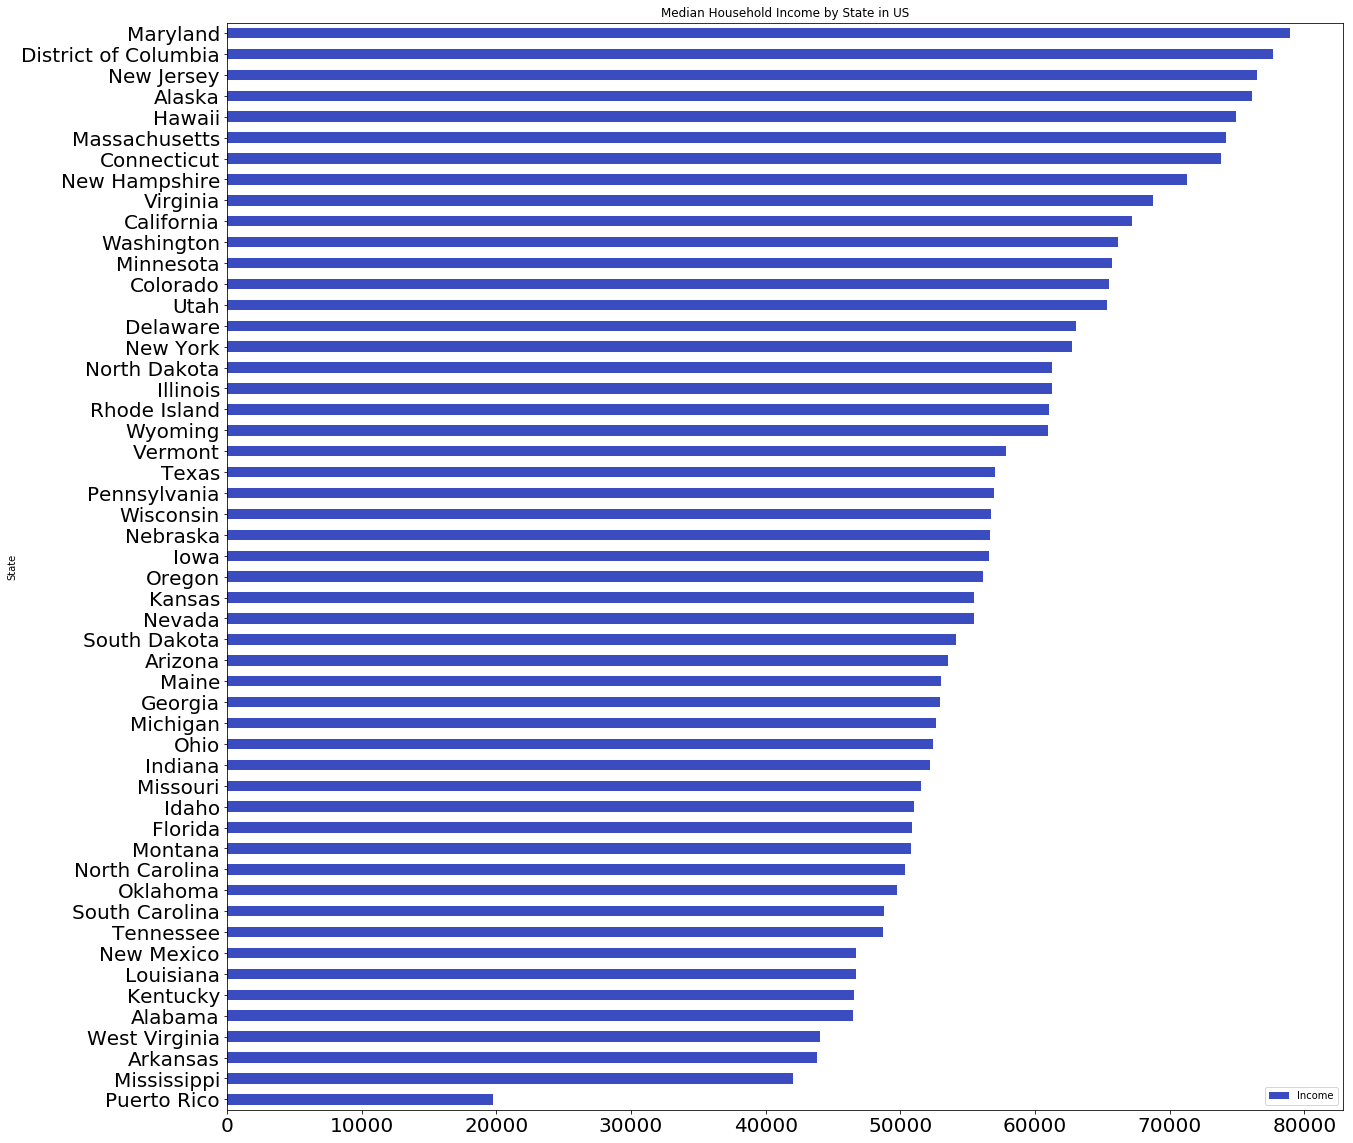

In [24]:
#visualizing the result by bar chart
sorted_df1 = df1.sort_values(by='Income', ascending=True)
sorted_df1.plot('State', 'Income', kind='barh', 
         figsize=(20, 20), 
         fontsize=20, colormap='coolwarm', 
         title='Median Household Income by State in US')

### 2) Dentists per 100,000 population in each state - dentists working in dentistry 2001-2018.

In [25]:
#reading the data into dataframe
df2 = pd.read_csv("https://raw.githubusercontent.com/mhan1/Capstone-Project/master/supply_of_dentists_in_us.csv")
df2.head(3)

,Unnamed: 0,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,42.28,41.65,41.70,41.54,40.86,41.24,41.24,41.27,41.36,42.41,42.64,43.73,44.14,43.86,43.74,43.23,40.43,41.78
1,Alaska,72.59,70.06,71.10,71.74,74.37,72.86,74.82,76.37,77.26,77.44,77.42,79.27,78.83,79.86,82.03,76.20,79.48,81.50
2,Arizona,44.54,44.83,47.13,48.30,50.09,50.64,50.98,52.67,53.54,53.83,53.62,53.85,54.45,53.58,53.69,53.66,53.85,54.42


In [26]:
#brief summary of the dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 19 columns):
Unnamed: 0    51 non-null object
2001          51 non-null float64
2002          51 non-null float64
2003          51 non-null float64
2004          51 non-null float64
2005          51 non-null float64
2006          51 non-null float64
2007          51 non-null float64
2008          51 non-null float64
2009          51 non-null float64
2010          51 non-null float64
2011          51 non-null float64
2012          51 non-null float64
2013          51 non-null float64
2014          51 non-null float64
2015          51 non-null float64
2016          51 non-null float64
2017          51 non-null float64
2018          51 non-null float64
dtypes: float64(18), object(1)
memory usage: 7.6+ KB


In [27]:
# checking if there is null value in each column
df2.isnull().any(axis=0)

Unnamed: 0    False
2001          False
2002          False
2003          False
2004          False
2005          False
2006          False
2007          False
2008          False
2009          False
2010          False
2011          False
2012          False
2013          False
2014          False
2015          False
2016          False
2017          False
2018          False
dtype: bool

In [28]:
#checking the column names
df2.columns

Index(['Unnamed: 0', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

In [29]:
#changing the column name into appropriate name.
df2.rename(columns={'Unnamed: 0':'state'}, 
                 inplace=True)
df2.head(3)

,state,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,42.28,41.65,41.70,41.54,40.86,41.24,41.24,41.27,41.36,42.41,42.64,43.73,44.14,43.86,43.74,43.23,40.43,41.78
1,Alaska,72.59,70.06,71.10,71.74,74.37,72.86,74.82,76.37,77.26,77.44,77.42,79.27,78.83,79.86,82.03,76.20,79.48,81.50
2,Arizona,44.54,44.83,47.13,48.30,50.09,50.64,50.98,52.67,53.54,53.83,53.62,53.85,54.45,53.58,53.69,53.66,53.85,54.42


In [30]:
#checking the number of rows and columns
df2.shape

(51, 19)

In [31]:
#checking the unique values in the 'state' column
df2['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [32]:
#checking the number of states in the df2 dataframe
len(df2['state'])

51

- Unlike the df1 dataframe 'State' column, df2 dataframe 'state' column does not include Puerto Rico, thereby having only 51 states instead of 52 states.

In [33]:
#transposing the dataframe
df2 = df2.T
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2001,42.28,72.59,44.54,38.16,65.78,64.13,75.68,43.48,114.36,49.25,...,46.44,50.83,45.03,61.04,56.68,57.01,64.94,48.74,57.15,53.77
2002,41.65,70.06,44.83,38.14,72.75,63.09,74.36,43.91,110.44,48.41,...,47.37,50.67,44.31,59.88,58.01,54.76,65.48,46.19,55.98,51
2003,41.7,71.1,47.13,39.12,72.78,64.34,74.39,45.35,106.07,49.78,...,46.88,48.79,44.7,62.07,58.91,55.6,66.43,45.91,53.71,52.04
2004,41.54,71.74,48.3,38.77,74.1,64.2,74.17,44.17,104.98,49.01,...,47.38,48.99,44.45,54.17,57.43,55.21,66.42,47.24,54.93,52.64


In [34]:
#converting the first row into column header.
df2.columns = df2.iloc[0]
df2.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2001,42.28,72.59,44.54,38.16,65.78,64.13,75.68,43.48,114.36,49.25,...,46.44,50.83,45.03,61.04,56.68,57.01,64.94,48.74,57.15,53.77
2002,41.65,70.06,44.83,38.14,72.75,63.09,74.36,43.91,110.44,48.41,...,47.37,50.67,44.31,59.88,58.01,54.76,65.48,46.19,55.98,51
2003,41.7,71.1,47.13,39.12,72.78,64.34,74.39,45.35,106.07,49.78,...,46.88,48.79,44.7,62.07,58.91,55.6,66.43,45.91,53.71,52.04
2004,41.54,71.74,48.3,38.77,74.1,64.2,74.17,44.17,104.98,49.01,...,47.38,48.99,44.45,54.17,57.43,55.21,66.42,47.24,54.93,52.64


In [35]:
#dropping the first row
df2 = df2.drop(df2.index[0])
df2

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2001,42.28,72.59,44.54,38.16,65.78,64.13,75.68,43.48,114.36,49.25,...,46.44,50.83,45.03,61.04,56.68,57.01,64.94,48.74,57.15,53.77
2002,41.65,70.06,44.83,38.14,72.75,63.09,74.36,43.91,110.44,48.41,...,47.37,50.67,44.31,59.88,58.01,54.76,65.48,46.19,55.98,51
2003,41.7,71.1,47.13,39.12,72.78,64.34,74.39,45.35,106.07,49.78,...,46.88,48.79,44.7,62.07,58.91,55.6,66.43,45.91,53.71,52.04
2004,41.54,71.74,48.3,38.77,74.1,64.2,74.17,44.17,104.98,49.01,...,47.38,48.99,44.45,54.17,57.43,55.21,66.42,47.24,54.93,52.64
2005,40.86,74.37,50.09,39.12,74.54,64.75,73.05,43.9,101.74,48.64,...,46.81,48.91,44.59,60.83,56.5,54.89,67.04,45.59,51.39,53.1
2006,41.24,72.86,50.64,39.44,73.32,65.74,73.18,44.34,106.19,47.91,...,49.04,48.35,44.21,61.77,55.07,56.19,66.88,45.84,51.35,50.51
2007,41.24,74.82,50.98,38.68,75.94,66.51,72.35,43.71,105.85,49.09,...,49.01,48.67,45.43,64.25,56.3,57.45,67.72,45.75,51.88,48.8
2008,41.27,76.37,52.67,39,76.5,65.95,72.6,43.9,106.16,49.11,...,50.93,48.15,45.59,65.19,57.04,58.1,67.83,46.19,52.65,48.16
2009,41.36,77.26,53.54,39.56,77.31,66.75,72.15,44.63,104.18,49.7,...,49.93,47.65,46.04,64.48,55.54,58.68,68.96,46.81,52.9,47.69
2010,42.41,77.44,53.83,39.64,77.1,67.88,73.42,45.21,100.71,50.15,...,51.34,48.19,47.48,65.92,55.93,59.02,70.65,46.25,52.47,49.68


In [36]:
df2.columns

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [37]:
len(df2.columns)

51

In [38]:
#brief summary of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 2001 to 2018
Data columns (total 51 columns):
Alabama                 18 non-null object
Alaska                  18 non-null object
Arizona                 18 non-null object
Arkansas                18 non-null object
California              18 non-null object
Colorado                18 non-null object
Connecticut             18 non-null object
Delaware                18 non-null object
District of Columbia    18 non-null object
Florida                 18 non-null object
Georgia                 18 non-null object
Hawaii                  18 non-null object
Idaho                   18 non-null object
Illinois                18 non-null object
Indiana                 18 non-null object
Iowa                    18 non-null object
Kansas                  18 non-null object
Kentucky                18 non-null object
Louisiana               18 non-null object
Maine                   18 non-null object
Maryland                18 non-null o

In [39]:
# convert all columns of the dataframe into numeric data type.
df2 = df2.apply(pd.to_numeric)

In [40]:
#checking the data type
df2.dtypes

state
Alabama                 float64
Alaska                  float64
Arizona                 float64
Arkansas                float64
California              float64
Colorado                float64
Connecticut             float64
Delaware                float64
District of Columbia    float64
Florida                 float64
Georgia                 float64
Hawaii                  float64
Idaho                   float64
Illinois                float64
Indiana                 float64
Iowa                    float64
Kansas                  float64
Kentucky                float64
Louisiana               float64
Maine                   float64
Maryland                float64
Massachusetts           float64
Michigan                float64
Minnesota               float64
Mississippi             float64
Missouri                float64
Montana                 float64
Nebraska                float64
Nevada                  float64
New Hampshire           float64
New Jersey              float64
Ne

In [41]:
#descriptive statistics of the dataframe
df2.describe()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,42.172222,76.288889,51.537222,39.877222,75.372778,67.111667,74.447778,44.660000,104.448333,49.920556,...,50.531111,49.103333,47.734444,62.496111,56.718889,59.061111,68.900000,46.857222,54.621111,52.187222
std,1.138356,3.594548,3.278776,1.211833,2.926405,2.366027,1.556650,0.944333,3.486389,1.183392,...,2.716254,0.836801,3.208867,2.831730,0.980209,3.069980,2.328572,0.902420,2.135930,2.454863
min,40.430000,70.060000,44.540000,38.140000,65.780000,63.090000,72.150000,43.320000,100.680000,47.910000,...,46.440000,47.650000,44.210000,54.170000,55.070000,54.760000,64.940000,45.590000,51.350000,47.690000
25%,41.292500,73.237500,50.227500,39.030000,74.210000,64.997500,73.212500,43.902500,102.107500,49.095000,...,47.787500,48.632500,44.782500,61.080000,56.335000,56.395000,66.920000,46.190000,52.712500,50.632500
50%,41.740000,76.815000,53.560000,39.600000,76.515000,67.315000,74.375000,44.345000,103.465000,49.780000,...,51.135000,48.950000,46.760000,62.100000,56.650000,58.850000,69.675000,46.790000,54.975000,52.785000
75%,43.082500,79.160000,53.795000,41.020000,77.082500,68.877500,75.655000,45.315000,106.015000,50.722500,...,53.090000,49.485000,50.547500,64.772500,57.332500,62.395000,70.672500,47.612500,56.115000,53.685000
max,44.140000,82.030000,54.450000,42.110000,77.790000,70.410000,77.130000,46.320000,114.360000,52.050000,...,53.870000,50.830000,52.900000,65.920000,58.910000,63.120000,72.920000,48.740000,58.230000,55.790000


In [42]:
#sanity check
df2

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2001,42.28,72.59,44.54,38.16,65.78,64.13,75.68,43.48,114.36,49.25,...,46.44,50.83,45.03,61.04,56.68,57.01,64.94,48.74,57.15,53.77
2002,41.65,70.06,44.83,38.14,72.75,63.09,74.36,43.91,110.44,48.41,...,47.37,50.67,44.31,59.88,58.01,54.76,65.48,46.19,55.98,51.00
2003,41.70,71.10,47.13,39.12,72.78,64.34,74.39,45.35,106.07,49.78,...,46.88,48.79,44.70,62.07,58.91,55.60,66.43,45.91,53.71,52.04
2004,41.54,71.74,48.30,38.77,74.10,64.20,74.17,44.17,104.98,49.01,...,47.38,48.99,44.45,54.17,57.43,55.21,66.42,47.24,54.93,52.64
2005,40.86,74.37,50.09,39.12,74.54,64.75,73.05,43.90,101.74,48.64,...,46.81,48.91,44.59,60.83,56.50,54.89,67.04,45.59,51.39,53.10
2006,41.24,72.86,50.64,39.44,73.32,65.74,73.18,44.34,106.19,47.91,...,49.04,48.35,44.21,61.77,55.07,56.19,66.88,45.84,51.35,50.51
2007,41.24,74.82,50.98,38.68,75.94,66.51,72.35,43.71,105.85,49.09,...,49.01,48.67,45.43,64.25,56.30,57.45,67.72,45.75,51.88,48.80
2008,41.27,76.37,52.67,39.00,76.50,65.95,72.60,43.90,106.16,49.11,...,50.93,48.15,45.59,65.19,57.04,58.10,67.83,46.19,52.65,48.16
2009,41.36,77.26,53.54,39.56,77.31,66.75,72.15,44.63,104.18,49.70,...,49.93,47.65,46.04,64.48,55.54,58.68,68.96,46.81,52.90,47.69
2010,42.41,77.44,53.83,39.64,77.10,67.88,73.42,45.21,100.71,50.15,...,51.34,48.19,47.48,65.92,55.93,59.02,70.65,46.25,52.47,49.68


In [43]:
#transposing df2
df2 = df2.T
df2

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
state,,,,,,,,,,,,,,,,,,
Alabama,42.28,41.65,41.70,41.54,40.86,41.24,41.24,41.27,41.36,42.41,42.64,43.73,44.14,43.86,43.74,43.23,40.43,41.78
Alaska,72.59,70.06,71.10,71.74,74.37,72.86,74.82,76.37,77.26,77.44,77.42,79.27,78.83,79.86,82.03,76.20,79.48,81.50
Arizona,44.54,44.83,47.13,48.30,50.09,50.64,50.98,52.67,53.54,53.83,53.62,53.85,54.45,53.58,53.69,53.66,53.85,54.42
Arkansas,38.16,38.14,39.12,38.77,39.12,39.44,38.68,39.00,39.56,39.64,39.82,40.34,41.09,40.81,41.10,41.20,41.69,42.11
California,65.78,72.75,72.78,74.10,74.54,73.32,75.94,76.50,77.31,77.10,76.33,76.83,77.00,76.53,77.32,77.03,77.76,77.79
Colorado,64.13,63.09,64.34,64.20,64.75,65.74,66.51,65.95,66.75,67.88,68.12,68.70,68.89,68.84,69.97,69.65,70.41,70.09
Connecticut,75.68,74.36,74.39,74.17,73.05,73.18,72.35,72.60,72.15,73.42,75.58,74.92,77.00,75.72,77.13,76.37,74.68,73.31
Delaware,43.48,43.91,45.35,44.17,43.90,44.34,43.71,43.90,44.63,45.21,45.19,46.00,46.12,46.32,45.68,44.35,44.30,43.32
District of Columbia,114.36,110.44,106.07,104.98,101.74,106.19,105.85,106.16,104.18,100.71,103.29,103.19,102.55,100.68,101.30,101.96,103.64,102.78


In [44]:
#calculating the mean along the rows and making new column in df2
df2['mean'] = df2.mean(axis=1)
df2.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,mean
state,,,,,,,,,,,,,,,,,,,
Alabama,42.28,41.65,41.70,41.54,40.86,41.24,41.24,41.27,41.36,42.41,42.64,43.73,44.14,43.86,43.74,43.23,40.43,41.78,42.172222
Alaska,72.59,70.06,71.10,71.74,74.37,72.86,74.82,76.37,77.26,77.44,77.42,79.27,78.83,79.86,82.03,76.20,79.48,81.50,76.288889
Arizona,44.54,44.83,47.13,48.30,50.09,50.64,50.98,52.67,53.54,53.83,53.62,53.85,54.45,53.58,53.69,53.66,53.85,54.42,51.537222
Arkansas,38.16,38.14,39.12,38.77,39.12,39.44,38.68,39.00,39.56,39.64,39.82,40.34,41.09,40.81,41.10,41.20,41.69,42.11,39.877222
California,65.78,72.75,72.78,74.10,74.54,73.32,75.94,76.50,77.31,77.10,76.33,76.83,77.00,76.53,77.32,77.03,77.76,77.79,75.372778


In [45]:
#sorting the dataframe by the mean value
df2 = df2.sort_values(by='mean', ascending=False)
df2[['mean']]

,mean
state,
District of Columbia,104.448333
Massachusetts,78.183889
Hawaii,77.486111
New Jersey,77.410556
Alaska,76.288889
California,75.372778
New York,75.089444
Connecticut,74.447778
Maryland,70.900556


In [46]:
#ranking the State based on Income and then combining with the sorted dataframe. 
rank_df2 = df2['mean'].rank(ascending=False)
result2 = pd.concat([df2, rank_df2], axis=1)
result2['mean_Ranking'] = rank_df2
result2.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,mean,mean,mean_Ranking
state,,,,,,,,,,,,,,,,,,,,,
District of Columbia,114.36,110.44,106.07,104.98,101.74,106.19,105.85,106.16,104.18,100.71,...,103.19,102.55,100.68,101.30,101.96,103.64,102.78,104.448333,1.0,1.0
Massachusetts,78.58,77.98,76.31,76.98,76.96,75.07,76.39,76.77,78.17,78.17,...,77.98,77.35,77.95,78.12,80.78,82.61,82.74,78.183889,2.0,2.0
Hawaii,82.63,78.90,79.45,77.81,78.21,77.27,78.59,77.84,77.82,77.63,...,75.49,75.54,75.41,76.35,77.03,75.97,75.96,77.486111,3.0,3.0
New Jersey,68.64,72.81,73.09,76.29,77.40,77.31,77.56,77.88,78.90,77.98,...,79.76,79.77,79.72,80.56,79.31,78.65,79.01,77.410556,4.0,4.0
Alaska,72.59,70.06,71.10,71.74,74.37,72.86,74.82,76.37,77.26,77.44,...,79.27,78.83,79.86,82.03,76.20,79.48,81.50,76.288889,5.0,5.0


In [47]:
result2.tail()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,mean,mean,mean_Ranking
state,,,,,,,,,,,,,,,,,,,,,
Georgia,42.72,42.21,44.19,44.03,44.79,44.90,45.19,45.45,45.53,46.21,...,46.73,47.12,46.90,47.40,46.95,47.26,46.78,45.611667,47.0,47.0
Delaware,43.48,43.91,45.35,44.17,43.90,44.34,43.71,43.90,44.63,45.21,...,46.00,46.12,46.32,45.68,44.35,44.30,43.32,44.660000,48.0,48.0
Alabama,42.28,41.65,41.70,41.54,40.86,41.24,41.24,41.27,41.36,42.41,...,43.73,44.14,43.86,43.74,43.23,40.43,41.78,42.172222,49.0,49.0
Mississippi,39.78,39.84,39.88,39.53,39.33,39.38,39.44,39.86,40.15,40.44,...,41.93,42.59,42.40,43.50,42.80,42.78,43.06,40.965556,50.0,50.0
Arkansas,38.16,38.14,39.12,38.77,39.12,39.44,38.68,39.00,39.56,39.64,...,40.34,41.09,40.81,41.10,41.20,41.69,42.11,39.877222,51.0,51.0


- As shown above table, the top five states in US that have the most dentist supply per 100,000 population are District of Columbia, Massachusetts, Hawaii, New Jersey, and Alaska. The bottom five states that have the least dentist working in dentistry per 100,000 population are Arkansas, Mississippi, Alabama, Delaware, and Georgia.
<br>
This result approximately matches with the median household income result as shown above, the top five wealthy states are Maryland, District of Columbia, New Jersey, Alaska, and Hawaii, and the bottom five unwealthy states are Puerto Rico, Mississippi, Arkansas, West Virginia, and Alabama.
<br>
Based on that, I can conclude that the wealthier states have more dentists working in dentistry per 100,000 population as there are more demands for cosmetic dentistry treatment as well as general dental care.(Wealth effect and dental care utilization in the U.S. J Public Health Dent. 2012 ; 72(3): 179–189. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3433846/; Characteristics of Dentists Providing Dental Care to Publicly Insured Patients. J Public Health Dent. 2007 Fall; 67(4): 208–16. https://www.ncbi.nlm.nih.gov/pubmed/18087991)
<br>
Furthermore, I will analyze which practice areas are the most dominant in US in the next data set.

In [48]:
sorted_df2 = result2.sort_values(by='mean_Ranking', ascending=True)
sorted_df2.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,mean,mean,mean_Ranking
state,,,,,,,,,,,,,,,,,,,,,
District of Columbia,114.36,110.44,106.07,104.98,101.74,106.19,105.85,106.16,104.18,100.71,...,103.19,102.55,100.68,101.30,101.96,103.64,102.78,104.448333,1.0,1.0
Massachusetts,78.58,77.98,76.31,76.98,76.96,75.07,76.39,76.77,78.17,78.17,...,77.98,77.35,77.95,78.12,80.78,82.61,82.74,78.183889,2.0,2.0
Hawaii,82.63,78.90,79.45,77.81,78.21,77.27,78.59,77.84,77.82,77.63,...,75.49,75.54,75.41,76.35,77.03,75.97,75.96,77.486111,3.0,3.0
New Jersey,68.64,72.81,73.09,76.29,77.40,77.31,77.56,77.88,78.90,77.98,...,79.76,79.77,79.72,80.56,79.31,78.65,79.01,77.410556,4.0,4.0
Alaska,72.59,70.06,71.10,71.74,74.37,72.86,74.82,76.37,77.26,77.44,...,79.27,78.83,79.86,82.03,76.20,79.48,81.50,76.288889,5.0,5.0


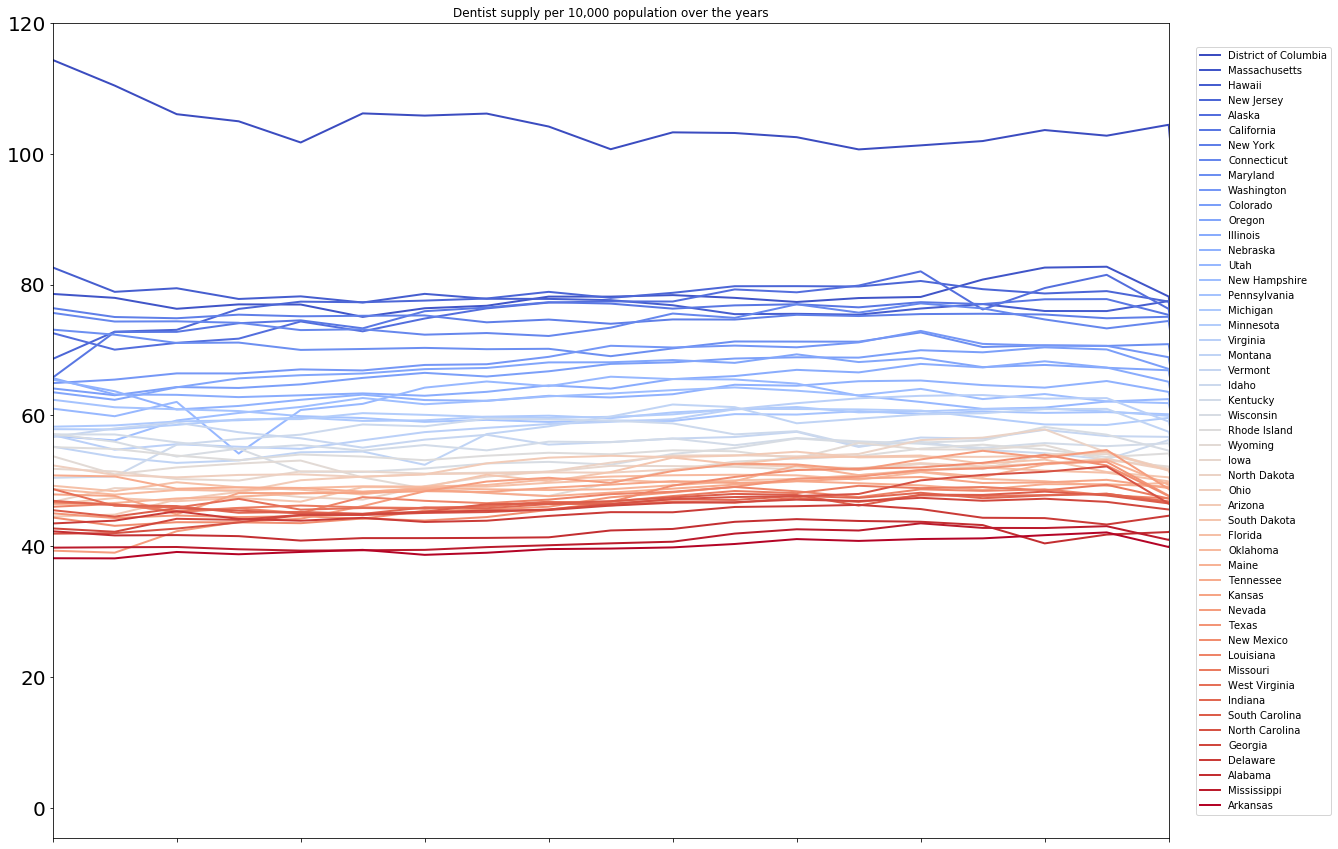

In [49]:
#visualizing the result by bar chart
sorted_df2.transpose().plot(figsize=(20,15), colormap='coolwarm', fontsize=20,
                            linewidth=2, 
                            title='Dentist supply per 10,000 population over the years')
                           
plt.legend(loc='right', bbox_to_anchor=(1.15, 0.5))
plt.xlim([0,18])
plt.show()

### 3) Supply of Dentists in the U.S. by practice area 2001-2018.

In [50]:
#reading the data into dataframe
df3 = pd.read_csv("https://raw.githubusercontent.com/mhan1/Capstone-Project/master/supply_of_dentists_by_practice_area.csv")
df3

,Unnamed: 0,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,General Practice,"130,775","133,213","134,629","135,736","137,150","138,000","141,217","142,966","145,323","145,980","148,189","150,235","152,021","152,153","154,755","155,121","156,992","157,676"
1,Oral and Maxillofacial Surgery,"6,358","6,285","6,359","6,587","6,508","6,576","6,576","6,597","6,694","6,922","6,981","7,082","7,261","7,374","7,559","7,594","7,546","7,509"
2,Endodontics,"4,045","4,080","4,157","4,333","4,517","4,522","4,561","4,658","4,754","4,959","5,025","5,118","5,306","5,384","5,552","5,631","5,664","5,704"
3,Orthodontics and Dentofacial Orthopedics,"9,265","9,260","9,295","9,500","9,568","9,585","9,629","9,726","9,800","9,982","10,169","10,355","10,413","10,527","10,672","10,680","10,658","10,779"
4,Pediatric Dentistry,"4,213","4,278","4,459","4,676","4,781","4,902","5,107","5,336","5,544","5,904","6,144","6,404","6,632","6,977","7,386","7,583","7,778","8,033"
5,Periodontics,"4,977","4,921","4,978","5,094","5,095","5,105","5,121","5,173","5,321","5,455","5,536","5,575","5,590","5,607","5,686","5,772","5,790","5,751"
6,Prosthodontics,"3,199","3,107","3,152","3,239","3,207","3,195","3,187","3,226","3,262","3,322","3,384","3,439","3,450","3,541","3,669","3,688","3,708","3,723"
7,Oral and Maxillofacial Pathology,416,396,396,426,484,450,440,437,432,437,441,448,403,415,418,424,426,429
8,Public Health Dentistry,958,909,894,900,"1,004",999,963,962,942,959,929,911,871,846,869,853,827,835
9,Oral and Maxillofacial Radiology,12,15,17,70,69,75,74,80,85,91,97,108,113,116,135,138,144,151


In [51]:
#checking the number of rows and columns
df3.shape

(10, 19)

In [52]:
#brief summary of the dataframe
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
Unnamed: 0    10 non-null object
2001          10 non-null object
2002          10 non-null object
2003          10 non-null object
2004          10 non-null object
2005          10 non-null object
2006          10 non-null object
2007          10 non-null object
2008          10 non-null object
2009          10 non-null object
2010          10 non-null object
2011          10 non-null object
2012          10 non-null object
2013          10 non-null object
2014          10 non-null object
2015          10 non-null object
2016          10 non-null object
2017          10 non-null object
2018          10 non-null object
dtypes: object(19)
memory usage: 1.6+ KB


In [53]:
# checking if there is null value in each column
df3.isnull().any(axis=0)

Unnamed: 0    False
2001          False
2002          False
2003          False
2004          False
2005          False
2006          False
2007          False
2008          False
2009          False
2010          False
2011          False
2012          False
2013          False
2014          False
2015          False
2016          False
2017          False
2018          False
dtype: bool

In [54]:
#checking the column names
df3.columns

Index(['Unnamed: 0', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

In [55]:
#changing the column name into appropriate name.
df3.rename(columns={'Unnamed: 0':'practice_area'}, 
                 inplace=True)
df3.head(3)

,practice_area,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,General Practice,"130,775","133,213","134,629","135,736","137,150","138,000","141,217","142,966","145,323","145,980","148,189","150,235","152,021","152,153","154,755","155,121","156,992","157,676"
1,Oral and Maxillofacial Surgery,"6,358","6,285","6,359","6,587","6,508","6,576","6,576","6,597","6,694","6,922","6,981","7,082","7,261","7,374","7,559","7,594","7,546","7,509"
2,Endodontics,"4,045","4,080","4,157","4,333","4,517","4,522","4,561","4,658","4,754","4,959","5,025","5,118","5,306","5,384","5,552","5,631","5,664","5,704"


In [56]:
#checking the unique values in the 'practice_area' column
df3['practice_area'].unique()

array(['General Practice', 'Oral and Maxillofacial Surgery',
       'Endodontics', 'Orthodontics and Dentofacial Orthopedics',
       'Pediatric Dentistry', 'Periodontics', 'Prosthodontics',
       'Oral and Maxillofacial Pathology', 'Public Health Dentistry',
       'Oral and Maxillofacial Radiology'], dtype=object)

In [57]:
#transposing the dataframe
df3 = df3.T
df3.head()

,0,1,2,3,4,5,6,7,8,9
practice_area,General Practice,Oral and Maxillofacial Surgery,Endodontics,Orthodontics and Dentofacial Orthopedics,Pediatric Dentistry,Periodontics,Prosthodontics,Oral and Maxillofacial Pathology,Public Health Dentistry,Oral and Maxillofacial Radiology
2001,"130,775","6,358","4,045","9,265","4,213","4,977","3,199",416,958,12
2002,"133,213","6,285","4,080","9,260","4,278","4,921","3,107",396,909,15
2003,"134,629","6,359","4,157","9,295","4,459","4,978","3,152",396,894,17
2004,"135,736","6,587","4,333","9,500","4,676","5,094","3,239",426,900,70


In [58]:
#converting the first row into column header.
df3.columns = df3.iloc[0]
df3.head()

practice_area,General Practice,Oral and Maxillofacial Surgery,Endodontics,Orthodontics and Dentofacial Orthopedics,Pediatric Dentistry,Periodontics,Prosthodontics,Oral and Maxillofacial Pathology,Public Health Dentistry,Oral and Maxillofacial Radiology
practice_area,General Practice,Oral and Maxillofacial Surgery,Endodontics,Orthodontics and Dentofacial Orthopedics,Pediatric Dentistry,Periodontics,Prosthodontics,Oral and Maxillofacial Pathology,Public Health Dentistry,Oral and Maxillofacial Radiology
2001,"130,775","6,358","4,045","9,265","4,213","4,977","3,199",416,958,12
2002,"133,213","6,285","4,080","9,260","4,278","4,921","3,107",396,909,15
2003,"134,629","6,359","4,157","9,295","4,459","4,978","3,152",396,894,17
2004,"135,736","6,587","4,333","9,500","4,676","5,094","3,239",426,900,70


In [59]:
#dropping the first row
df3 = df3.drop(df3.index[0])
df3.head()

practice_area,General Practice,Oral and Maxillofacial Surgery,Endodontics,Orthodontics and Dentofacial Orthopedics,Pediatric Dentistry,Periodontics,Prosthodontics,Oral and Maxillofacial Pathology,Public Health Dentistry,Oral and Maxillofacial Radiology
2001,"130,775","6,358","4,045","9,265","4,213","4,977","3,199",416,958,12
2002,"133,213","6,285","4,080","9,260","4,278","4,921","3,107",396,909,15
2003,"134,629","6,359","4,157","9,295","4,459","4,978","3,152",396,894,17
2004,"135,736","6,587","4,333","9,500","4,676","5,094","3,239",426,900,70
2005,"137,150","6,508","4,517","9,568","4,781","5,095","3,207",484,"1,004",69


In [60]:
df3.columns

Index(['General Practice', 'Oral and Maxillofacial Surgery', 'Endodontics',
       'Orthodontics and Dentofacial Orthopedics', 'Pediatric Dentistry',
       'Periodontics', 'Prosthodontics', 'Oral and Maxillofacial Pathology',
       'Public Health Dentistry', 'Oral and Maxillofacial Radiology'],
      dtype='object', name='practice_area')

In [61]:
len(df3.columns)

10

In [62]:
#brief summary of the dataframe
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 2001 to 2018
Data columns (total 10 columns):
General Practice                            18 non-null object
Oral and Maxillofacial Surgery              18 non-null object
Endodontics                                 18 non-null object
Orthodontics and Dentofacial Orthopedics    18 non-null object
Pediatric Dentistry                         18 non-null object
Periodontics                                18 non-null object
Prosthodontics                              18 non-null object
Oral and Maxillofacial Pathology            18 non-null object
Public Health Dentistry                     18 non-null object
Oral and Maxillofacial Radiology            18 non-null object
dtypes: object(10)
memory usage: 1.5+ KB


In [63]:
#list of columns
cols = ['General Practice', 'Oral and Maxillofacial Surgery', 'Endodontics',
       'Orthodontics and Dentofacial Orthopedics', 'Pediatric Dentistry',
       'Periodontics', 'Prosthodontics', 'Oral and Maxillofacial Pathology',
       'Public Health Dentistry', 'Oral and Maxillofacial Radiology']

# passing the columns to df.replace() to remove the comma(,)
df3[cols] = df3[cols].replace({',': ''}, regex=True)
df3 = df3.astype(float)
df3.head()

practice_area,General Practice,Oral and Maxillofacial Surgery,Endodontics,Orthodontics and Dentofacial Orthopedics,Pediatric Dentistry,Periodontics,Prosthodontics,Oral and Maxillofacial Pathology,Public Health Dentistry,Oral and Maxillofacial Radiology
2001,130775.0,6358.0,4045.0,9265.0,4213.0,4977.0,3199.0,416.0,958.0,12.0
2002,133213.0,6285.0,4080.0,9260.0,4278.0,4921.0,3107.0,396.0,909.0,15.0
2003,134629.0,6359.0,4157.0,9295.0,4459.0,4978.0,3152.0,396.0,894.0,17.0
2004,135736.0,6587.0,4333.0,9500.0,4676.0,5094.0,3239.0,426.0,900.0,70.0
2005,137150.0,6508.0,4517.0,9568.0,4781.0,5095.0,3207.0,484.0,1004.0,69.0


In [64]:
#checking the datatype
df3.dtypes

practice_area
General Practice                            float64
Oral and Maxillofacial Surgery              float64
Endodontics                                 float64
Orthodontics and Dentofacial Orthopedics    float64
Pediatric Dentistry                         float64
Periodontics                                float64
Prosthodontics                              float64
Oral and Maxillofacial Pathology            float64
Public Health Dentistry                     float64
Oral and Maxillofacial Radiology            float64
dtype: object

In [65]:
#descriptive satatistics of the dataframe
df3.describe()

practice_area,General Practice,Oral and Maxillofacial Surgery,Endodontics,Orthodontics and Dentofacial Orthopedics,Pediatric Dentistry,Periodontics,Prosthodontics,Oral and Maxillofacial Pathology,Public Health Dentistry,Oral and Maxillofacial Radiology
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,145118.388889,6909.333333,4887.222222,9992.388889,5896.500000,5363.722222,3372.111111,428.777778,912.833333,88.333333
std,8760.422432,463.884621,564.316198,542.454676,1271.860946,306.655355,211.211878,21.159216,55.111918,42.689026
min,130775.000000,6285.000000,4045.000000,9260.000000,4213.000000,4921.000000,3107.000000,396.000000,827.000000,12.000000
25%,137362.500000,6576.000000,4518.250000,9572.250000,4811.250000,5097.500000,3201.000000,416.500000,869.500000,71.000000
50%,145651.500000,6808.000000,4856.500000,9891.000000,5724.000000,5388.000000,3292.000000,427.500000,910.000000,88.000000
75%,152120.000000,7345.750000,5364.500000,10498.500000,6890.750000,5602.750000,3518.250000,439.250000,958.750000,115.250000
max,157676.000000,7594.000000,5704.000000,10779.000000,8033.000000,5790.000000,3723.000000,484.000000,1004.000000,151.000000


In [66]:
#sanity check
df3

practice_area,General Practice,Oral and Maxillofacial Surgery,Endodontics,Orthodontics and Dentofacial Orthopedics,Pediatric Dentistry,Periodontics,Prosthodontics,Oral and Maxillofacial Pathology,Public Health Dentistry,Oral and Maxillofacial Radiology
2001,130775.0,6358.0,4045.0,9265.0,4213.0,4977.0,3199.0,416.0,958.0,12.0
2002,133213.0,6285.0,4080.0,9260.0,4278.0,4921.0,3107.0,396.0,909.0,15.0
2003,134629.0,6359.0,4157.0,9295.0,4459.0,4978.0,3152.0,396.0,894.0,17.0
2004,135736.0,6587.0,4333.0,9500.0,4676.0,5094.0,3239.0,426.0,900.0,70.0
2005,137150.0,6508.0,4517.0,9568.0,4781.0,5095.0,3207.0,484.0,1004.0,69.0
2006,138000.0,6576.0,4522.0,9585.0,4902.0,5105.0,3195.0,450.0,999.0,75.0
2007,141217.0,6576.0,4561.0,9629.0,5107.0,5121.0,3187.0,440.0,963.0,74.0
2008,142966.0,6597.0,4658.0,9726.0,5336.0,5173.0,3226.0,437.0,962.0,80.0
2009,145323.0,6694.0,4754.0,9800.0,5544.0,5321.0,3262.0,432.0,942.0,85.0
2010,145980.0,6922.0,4959.0,9982.0,5904.0,5455.0,3322.0,437.0,959.0,91.0


In [67]:
#transposing df3
df3 = df3.T
df3

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
practice_area,,,,,,,,,,,,,,,,,,
General Practice,130775.0,133213.0,134629.0,135736.0,137150.0,138000.0,141217.0,142966.0,145323.0,145980.0,148189.0,150235.0,152021.0,152153.0,154755.0,155121.0,156992.0,157676.0
Oral and Maxillofacial Surgery,6358.0,6285.0,6359.0,6587.0,6508.0,6576.0,6576.0,6597.0,6694.0,6922.0,6981.0,7082.0,7261.0,7374.0,7559.0,7594.0,7546.0,7509.0
Endodontics,4045.0,4080.0,4157.0,4333.0,4517.0,4522.0,4561.0,4658.0,4754.0,4959.0,5025.0,5118.0,5306.0,5384.0,5552.0,5631.0,5664.0,5704.0
Orthodontics and Dentofacial Orthopedics,9265.0,9260.0,9295.0,9500.0,9568.0,9585.0,9629.0,9726.0,9800.0,9982.0,10169.0,10355.0,10413.0,10527.0,10672.0,10680.0,10658.0,10779.0
Pediatric Dentistry,4213.0,4278.0,4459.0,4676.0,4781.0,4902.0,5107.0,5336.0,5544.0,5904.0,6144.0,6404.0,6632.0,6977.0,7386.0,7583.0,7778.0,8033.0
Periodontics,4977.0,4921.0,4978.0,5094.0,5095.0,5105.0,5121.0,5173.0,5321.0,5455.0,5536.0,5575.0,5590.0,5607.0,5686.0,5772.0,5790.0,5751.0
Prosthodontics,3199.0,3107.0,3152.0,3239.0,3207.0,3195.0,3187.0,3226.0,3262.0,3322.0,3384.0,3439.0,3450.0,3541.0,3669.0,3688.0,3708.0,3723.0
Oral and Maxillofacial Pathology,416.0,396.0,396.0,426.0,484.0,450.0,440.0,437.0,432.0,437.0,441.0,448.0,403.0,415.0,418.0,424.0,426.0,429.0
Public Health Dentistry,958.0,909.0,894.0,900.0,1004.0,999.0,963.0,962.0,942.0,959.0,929.0,911.0,871.0,846.0,869.0,853.0,827.0,835.0


In [68]:
#calculating the mean along the rows and making new column in df3
df3['mean'] = df3.mean(axis=1)
df3.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,mean
practice_area,,,,,,,,,,,,,,,,,,,
General Practice,130775.0,133213.0,134629.0,135736.0,137150.0,138000.0,141217.0,142966.0,145323.0,145980.0,148189.0,150235.0,152021.0,152153.0,154755.0,155121.0,156992.0,157676.0,145118.388889
Oral and Maxillofacial Surgery,6358.0,6285.0,6359.0,6587.0,6508.0,6576.0,6576.0,6597.0,6694.0,6922.0,6981.0,7082.0,7261.0,7374.0,7559.0,7594.0,7546.0,7509.0,6909.333333
Endodontics,4045.0,4080.0,4157.0,4333.0,4517.0,4522.0,4561.0,4658.0,4754.0,4959.0,5025.0,5118.0,5306.0,5384.0,5552.0,5631.0,5664.0,5704.0,4887.222222
Orthodontics and Dentofacial Orthopedics,9265.0,9260.0,9295.0,9500.0,9568.0,9585.0,9629.0,9726.0,9800.0,9982.0,10169.0,10355.0,10413.0,10527.0,10672.0,10680.0,10658.0,10779.0,9992.388889
Pediatric Dentistry,4213.0,4278.0,4459.0,4676.0,4781.0,4902.0,5107.0,5336.0,5544.0,5904.0,6144.0,6404.0,6632.0,6977.0,7386.0,7583.0,7778.0,8033.0,5896.500000


In [69]:
#sorting the dataframe by the mean value
df3 = df3.sort_values(by='mean', ascending=False)
df3[['mean']]

,mean
practice_area,
General Practice,145118.388889
Orthodontics and Dentofacial Orthopedics,9992.388889
Oral and Maxillofacial Surgery,6909.333333
Pediatric Dentistry,5896.500000
Periodontics,5363.722222
Endodontics,4887.222222
Prosthodontics,3372.111111
Public Health Dentistry,912.833333
Oral and Maxillofacial Pathology,428.777778


In [70]:
#ranking the practice area based on supply of dentists and then combining with the sorted dataframe. 
rank_df3 = df3['mean'].rank(ascending=False)
result3 = pd.concat([df3, rank_df3], axis=1)
result3['mean_Ranking'] = rank_df3
result3

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,mean,mean,mean_Ranking
practice_area,,,,,,,,,,,,,,,,,,,,,
General Practice,130775.0,133213.0,134629.0,135736.0,137150.0,138000.0,141217.0,142966.0,145323.0,145980.0,...,150235.0,152021.0,152153.0,154755.0,155121.0,156992.0,157676.0,145118.388889,1.0,1.0
Orthodontics and Dentofacial Orthopedics,9265.0,9260.0,9295.0,9500.0,9568.0,9585.0,9629.0,9726.0,9800.0,9982.0,...,10355.0,10413.0,10527.0,10672.0,10680.0,10658.0,10779.0,9992.388889,2.0,2.0
Oral and Maxillofacial Surgery,6358.0,6285.0,6359.0,6587.0,6508.0,6576.0,6576.0,6597.0,6694.0,6922.0,...,7082.0,7261.0,7374.0,7559.0,7594.0,7546.0,7509.0,6909.333333,3.0,3.0
Pediatric Dentistry,4213.0,4278.0,4459.0,4676.0,4781.0,4902.0,5107.0,5336.0,5544.0,5904.0,...,6404.0,6632.0,6977.0,7386.0,7583.0,7778.0,8033.0,5896.500000,4.0,4.0
Periodontics,4977.0,4921.0,4978.0,5094.0,5095.0,5105.0,5121.0,5173.0,5321.0,5455.0,...,5575.0,5590.0,5607.0,5686.0,5772.0,5790.0,5751.0,5363.722222,5.0,5.0
Endodontics,4045.0,4080.0,4157.0,4333.0,4517.0,4522.0,4561.0,4658.0,4754.0,4959.0,...,5118.0,5306.0,5384.0,5552.0,5631.0,5664.0,5704.0,4887.222222,6.0,6.0
Prosthodontics,3199.0,3107.0,3152.0,3239.0,3207.0,3195.0,3187.0,3226.0,3262.0,3322.0,...,3439.0,3450.0,3541.0,3669.0,3688.0,3708.0,3723.0,3372.111111,7.0,7.0
Public Health Dentistry,958.0,909.0,894.0,900.0,1004.0,999.0,963.0,962.0,942.0,959.0,...,911.0,871.0,846.0,869.0,853.0,827.0,835.0,912.833333,8.0,8.0
Oral and Maxillofacial Pathology,416.0,396.0,396.0,426.0,484.0,450.0,440.0,437.0,432.0,437.0,...,448.0,403.0,415.0,418.0,424.0,426.0,429.0,428.777778,9.0,9.0


- As shown above, the top five practice areas from 2001 to 2018 are General Practice, Orthodontics and Dentofacial Orthopedics, Oral and Maxillofacial Surgery, Pediatric Dentistry, Periodontics. Among these five practice areas, Orthodontics and Periodontics are cosmetic dentistry treatment, and periodontics and surgical care are practiced by dentists who are more likely to see public patients(Characteristics of Dentists Providing Dental Care to Publicly Insured Patients. J Public Health Dent. 2007 Fall; 67(4): 208–16. https://www.ncbi.nlm.nih.gov/pubmed/18087991). Based on this result, I can conclude that the company can emphasize differecnt aspects of software functionality depending on the median household income(the wealth level of the state), as the software integrates all the clinical, administrative, and financial data in one place.

In [71]:
#sorting the dataframe by ranking based on mean value.
sorted_df3 = result3.sort_values(by='mean_Ranking', ascending=True)
sorted_df3.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,mean,mean,mean_Ranking
practice_area,,,,,,,,,,,,,,,,,,,,,
General Practice,130775.0,133213.0,134629.0,135736.0,137150.0,138000.0,141217.0,142966.0,145323.0,145980.0,...,150235.0,152021.0,152153.0,154755.0,155121.0,156992.0,157676.0,145118.388889,1.0,1.0
Orthodontics and Dentofacial Orthopedics,9265.0,9260.0,9295.0,9500.0,9568.0,9585.0,9629.0,9726.0,9800.0,9982.0,...,10355.0,10413.0,10527.0,10672.0,10680.0,10658.0,10779.0,9992.388889,2.0,2.0
Oral and Maxillofacial Surgery,6358.0,6285.0,6359.0,6587.0,6508.0,6576.0,6576.0,6597.0,6694.0,6922.0,...,7082.0,7261.0,7374.0,7559.0,7594.0,7546.0,7509.0,6909.333333,3.0,3.0
Pediatric Dentistry,4213.0,4278.0,4459.0,4676.0,4781.0,4902.0,5107.0,5336.0,5544.0,5904.0,...,6404.0,6632.0,6977.0,7386.0,7583.0,7778.0,8033.0,5896.500000,4.0,4.0
Periodontics,4977.0,4921.0,4978.0,5094.0,5095.0,5105.0,5121.0,5173.0,5321.0,5455.0,...,5575.0,5590.0,5607.0,5686.0,5772.0,5790.0,5751.0,5363.722222,5.0,5.0


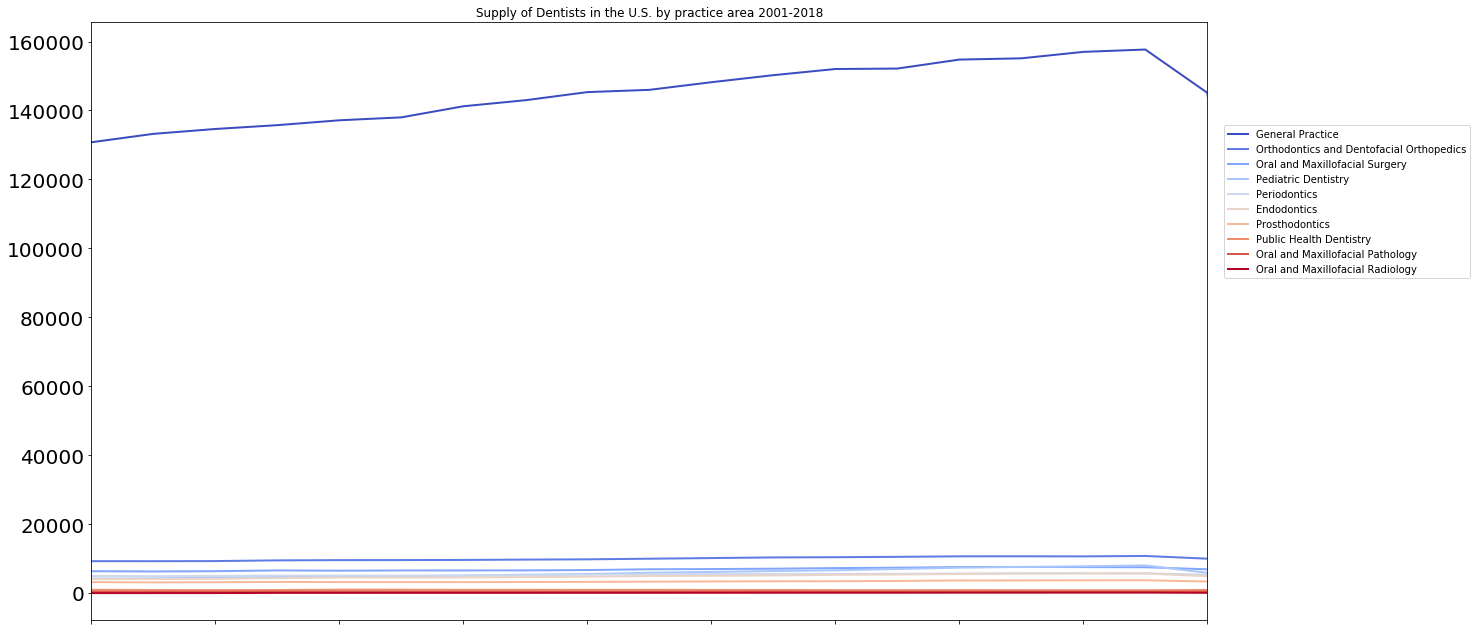

In [72]:
#visualizing the result by bar chart
sorted_df3.transpose().plot(figsize=(20,11), colormap='coolwarm', fontsize=20,
                            linewidth=2, 
                            title='Supply of Dentists in the U.S. by practice area 2001-2018')
                           
plt.legend(loc='right', bbox_to_anchor=(1.24, 0.7))
plt.xlim([0,18])
plt.show()

# 2. Key findings & Recommendations

#### 1) As shown above table, the top five wealthy states in US are Maryland, District of Columbia, New Jersey, Alaska, Hawaii. The bottom five unwealthy states in US are Puerto Rico, Mississippi, Arkansas, West Virginia, Alabama. I will further anlyze the supply of dentist per 100,000 population in each state to see if there is discrepancy with this result. Also, I will analyze which practice areas are dominant in US as well.<br>
#### 2) As shown above table, the top five states in US that have the most dentist supply per 100,000 population are District of Columbia, Massachusetts, Hawaii, New Jersey, and Alaska. The bottom five states that have the least dentist working in dentistry per 100,000 population are Arkansas, Mississippi, Alabama, Delaware, and Georgia. <br> This result approximately matches with the median household income result as shown above, the top five wealthy states are Maryland, District of Columbia, New Jersey, Alaska, and Hawaii, and the bottom five unwealthy states are Puerto Rico, Mississippi, Arkansas, West Virginia, and Alabama. <br> Based on that, I can conclude that the wealthier states have more dentists working in dentistry per 100,000 population as there are more demands for cosmetic dentistry treatment as well as general dental care.(Wealth effect and dental care utilization in the U.S. J Public Health Dent. 2012 ; 72(3): 179–189. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3433846/; Characteristics of Dentists Providing Dental Care to Publicly Insured Patients. J Public Health Dent. 2007 Fall; 67(4): 208–16. https://www.ncbi.nlm.nih.gov/pubmed/18087991) <br> Furthermore, I will analyze which practice areas are the most dominant in US in the next data set.<br>
#### 3) As shown above, the top five practice areas from 2001 to 2018 are General Practice, Orthodontics and Dentofacial Orthopedics, Oral and Maxillofacial Surgery, Pediatric Dentistry, Periodontics. Among these five practice areas, Orthodontics and Periodontics are cosmetic dentistry treatment, and periodontics and surgical care are practiced by dentists who are more likely to see public patients(Characteristics of Dentists Providing Dental Care to Publicly Insured Patients. J Public Health Dent. 2007 Fall; 67(4): 208–16. https://www.ncbi.nlm.nih.gov/pubmed/18087991). <br> Based on this result, I can conclude that the company can emphasize differecnt aspects of software functionality depending on the median household income(the wealth level of the state), as the software integrates all the clinical, administrative, and financial data in one place.<br>
#### 4) Putting these all together, I will recommend the company to start marketing in the states that have the most dentist supply per 100,000 population as they are also among the top wealthiest states in US. Also, in these wealthy states, the company can emphasize the software functionalities that deal with the cosmetic dentistry treatment such as Orthodontics, Maxillofacial Surgery, Endodontics, Periodontics among the other functionalities. <br> Later on, the company can consider advertising the appointment/administration functionality of the software in unwealthy states as the business grows, as there are more patients that have longer wait-time because of more walk-in patients and unsystematic appointment/administrative management.<br>
#### 5) For further recommendations, I consulted the company CEO to obtain informatin on the marketing channels, and her main chanel was through emailing the attendees of dental trade shows and conferences where the company salesperson was deployed.<br> Considering this, I found the list of dental trade shows and conferences in US, to prioritize which dental trade shows and conferecnes the salesperson should be deployed for the marketing strategy.<br>Below is the link where I obtained the dental trade shows and conferences to deploy salesperson:<br>(1)https://www.lightscalpel.com/events/category/tradeshows/<br>(2)https://www.expodatabase.com/aussteller/messen/index.php?timer=m1565033223&i_cockpitkeyfindwo=2&i_cockpitkeywords=dental&i_cockpitkeyfindart=1&sortierid=0&timer=m1565033223&maxPerPage=20&i_land[]=177<br>Based on my key findings described above, I will start the marketing from the states that are wealthy and have the most dental supppy per 100,000 population at the same time, emphasizing the cosmetic dentistry treatment functionalities of the software.<br>For summary, here are the top 15 states that have the most dentists per 100,000 population: <br>- (1)District of Columbia, (2)Massachusetts, (3)Hawaii, (4)New Jersey, (5)Alaska, (6)California, (7)New York, (8)Connecticut, (9)Maryland, (10)Washington, (11)Colorado, (12)Oregon, (13)Illinois, (14)Nebraska, (15)Utah.<br><br>  Hence, I will recommend the company to deploy the salesperson to the following conferences for the marketing purposes:<br><br>(1)American Association of Oral and Maxillofacial Surgeons - 101st Annual Meeting Scientific Sessoins & Exhibition, September 16-21, Boston Convention and Exhibitoin Center, Boston, Massachusetts.<br><br> (2)Greater New York Dental Meeting, November 29-Deember 4, Jacob K. Javits Convention Center, New York, New York.<br><br> (3)American Association of Oral and Maxillofacial Surgeons, December 5-7, Sheraton Grand, Chicago, Illinois.<br><br> (4)American Dental Association Dental Meeting (ADA Dental Show),  September 5-7, Moscone Center, San Francisco, California.<br><br>As we see the business grows starting from these wealthy states with more dentist supplies per 100,000 population, the company can expand their marketing strategies in unwealthy states at their discretion.

In [74]:
%%HTML
<div class='tableauPlaceholder' id='viz1565302534754' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;WZ&#47;WZ2TFR26Y&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;WZ2TFR26Y' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;WZ&#47;WZ2TFR26Y&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1565302534754');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1227px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>